In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import os

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [2]:
import glob
all_files = glob.glob('../testdata/**/*.csv', recursive= True)
to_remove = glob.glob('../testdata/**/*[0-9].csv', recursive= True)

to_keep = [x for x in all_files if x not in to_remove]

In [3]:
to_keep

['../testdata\\ectoderm_info.csv',
 '../testdata\\endoderm_info.csv',
 '../testdata\\mesoderm_info.csv',
 '../testdata\\ecto\\TCGA-BRCA\\brca_data.csv',
 '../testdata\\ecto\\TCGA-GBM\\gbm_data.csv',
 '../testdata\\ecto\\TCGA-SKCM\\skcm_data.csv',
 '../testdata\\endo\\TCGA-COAD\\coad_data.csv',
 '../testdata\\endo\\TCGA-LIHC\\lihc_data.csv',
 '../testdata\\endo\\TCGA-LUAD\\luad_data.csv',
 '../testdata\\endo\\TCGA-PAAD\\paad_data.csv',
 '../testdata\\endo\\TCGA-STAD\\stad_data.csv',
 '../testdata\\endo\\TCGA-THCA\\thca_data.csv',
 '../testdata\\meso\\TCGA-KIRC\\kirc_data.csv',
 '../testdata\\meso\\TCGA-LAML\\laml_data.csv',
 '../testdata\\meso\\TCGA-PRAD\\prad_data.csv',
 '../testdata\\meso\\TCGA-UCEC\\ucec_data.csv']

In [4]:
ecto = pd.read_csv(to_keep[0], delimiter = ' ')
ecto['layer'] = 'Ectoderm'

In [5]:
endo = pd.read_csv(to_keep[1], delimiter = ' ')
endo['layer'] = 'Endoderm'

In [6]:
meso = pd.read_csv(to_keep[2], delimiter = ' ')
meso['layer'] = 'Mesoderm'

In [8]:
all_layers = endo.merge(ecto, how = 'outer')
all_layers = all_layers.merge(meso, how = 'outer')

In [9]:
sum(all_layers.Start_Position == all_layers.End_Position), len(all_layers), sum(all_layers.Start_Position == all_layers.End_Position)/len(all_layers)

(1492084, 1555257, 0.9593809897656786)

In [10]:
all_layers.groupby('layer').mean()

,Start_Position,End_Position
layer,,
Ectoderm,7.924095e+07,7.924096e+07
Endoderm,7.910466e+07,7.910466e+07
Mesoderm,7.854347e+07,7.854347e+07


In [11]:
all_layers.head()

,Hugo_Symbol,Chromosome,Start_Position,End_Position,layer
0,ATAD3B,chr1,1485803,1485803,Endoderm
1,CHD5,chr1,6146395,6146395,Endoderm
2,IFNLR1,chr1,24159060,24159060,Endoderm
3,IFNLR1,chr1,24159060,24159060,Endoderm
4,ADAMTSL4,chr1,150558533,150558533,Endoderm


In [10]:
all_layers.sort_values('Start_Position')

,Hugo_Symbol,Chromosome,Start_Position,End_Position,layer
1309449,WASH1,chr9,15996,15996,Mesoderm
1550945,WASH1,chr9,16002,16002,Mesoderm
613133,WASH1,chr9,16035,16035,Ectoderm
282146,WASH1,chr9,17145,17145,Endoderm
282147,WASH1,chr9,17145,17145,Endoderm
...,...,...,...,...,...
1085216,PGBD2,chr1,248918269,248918269,Mesoderm
1345546,PGBD2,chr1,248918271,248918271,Mesoderm
561168,PGBD2,chr1,248918338,248918338,Ectoderm
652057,PGBD2,chr1,248918345,248918345,Ectoderm


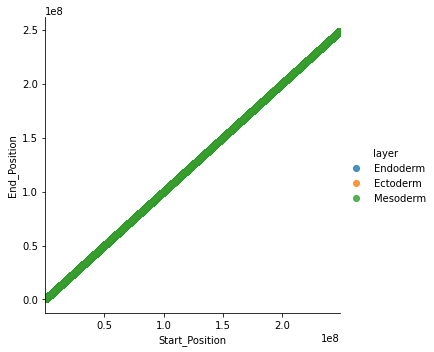

In [13]:
sns.lmplot(x= 'Start_Position', y= 'End_Position', data= all_layers, hue= 'layer')

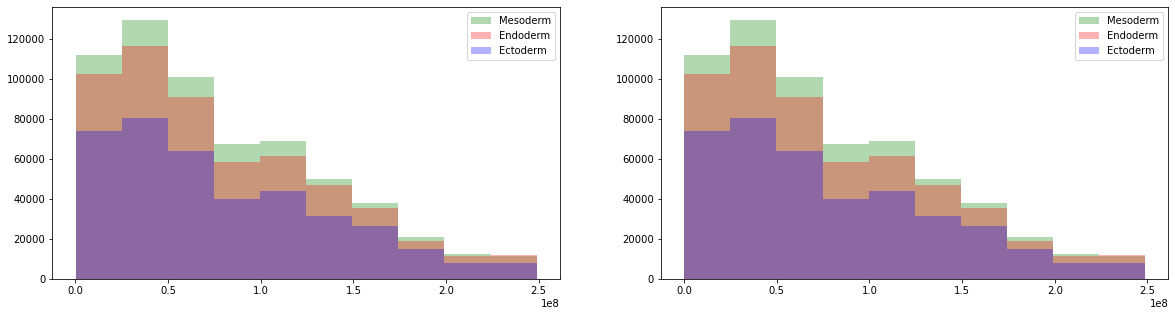

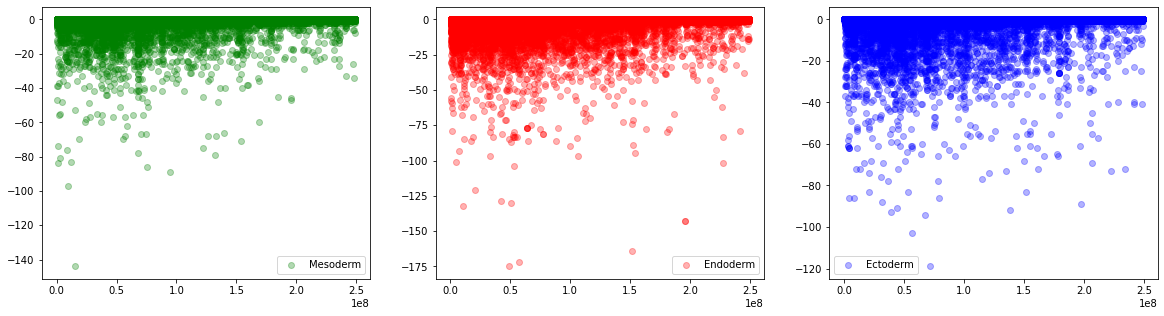

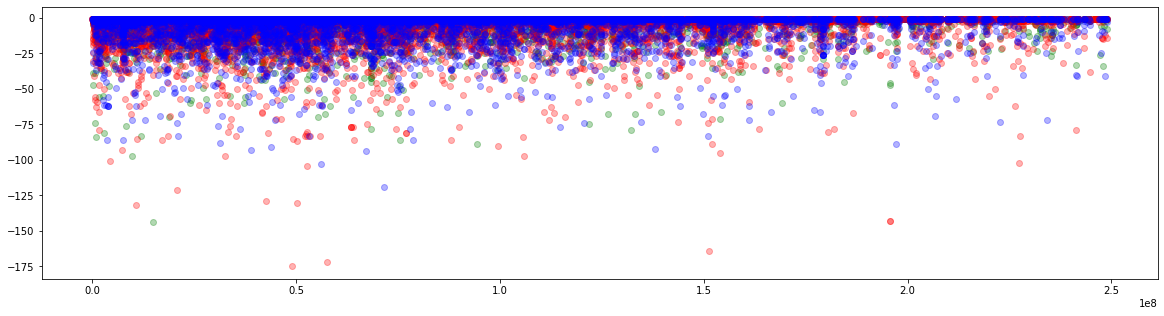

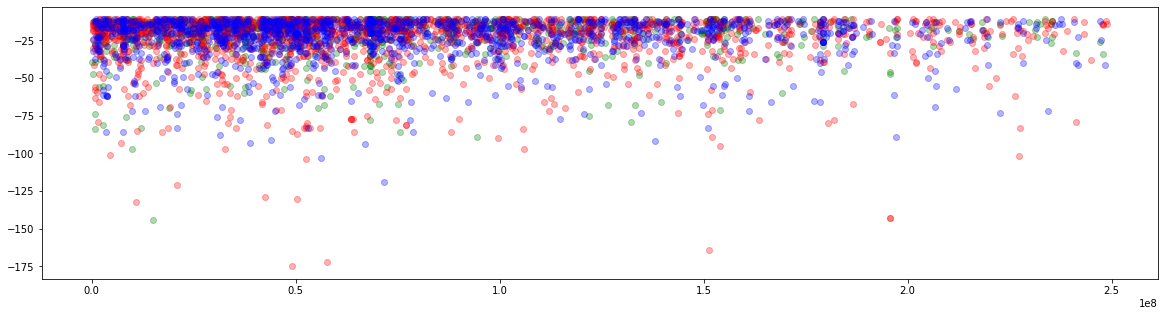

In [21]:
fig, ax = plt.subplots(1,2,  figsize = (20,5))
fig, ax1 = plt.subplots(1,3,  figsize = (20,5))
fig, ax2 = plt.subplots(1,1,  figsize = (20,5))
fig, ax3 = plt.subplots(1,1,  figsize = (20,5))

plt.subplots_adjust(wspace = 0.2)

colors = {'Mesoderm': 'Green', 'Endoderm': 'Red', 'Ectoderm': 'Blue'}
alpha_val = 0.3

starts = []
ends = []

for ind,i in enumerate(['Mesoderm', 'Endoderm', 'Ectoderm']):
    layer = all_layers.query(f'layer == "{i}"')
    hist1 = ax[0].hist(layer.Start_Position, color = colors[i], alpha = alpha_val, label = i)
    ax[0].legend()
    hist2 = ax[1].hist(layer.End_Position, color = colors[i], alpha = alpha_val, label = i)
    ax[1].legend()
    
    starts.append(hist1); ends.append(hist2)
    
    ax1[ind].scatter(layer.Start_Position, layer.Start_Position - layer.End_Position, 
                     alpha = alpha_val, label = i, color = colors[i])
    ax1[ind].legend()
    
    
    not_equal = layer.query('Start_Position != End_Position')
    ax2.scatter(not_equal.Start_Position, not_equal.Start_Position - not_equal.End_Position, 
                alpha = alpha_val, label = i, color = colors[i])
    
    
    not_equal = layer.query('End_Position - Start_Position > 10')
    ax3.scatter(not_equal.Start_Position, not_equal.Start_Position - not_equal.End_Position, 
                alpha = alpha_val, label = i, color = colors[i])
    

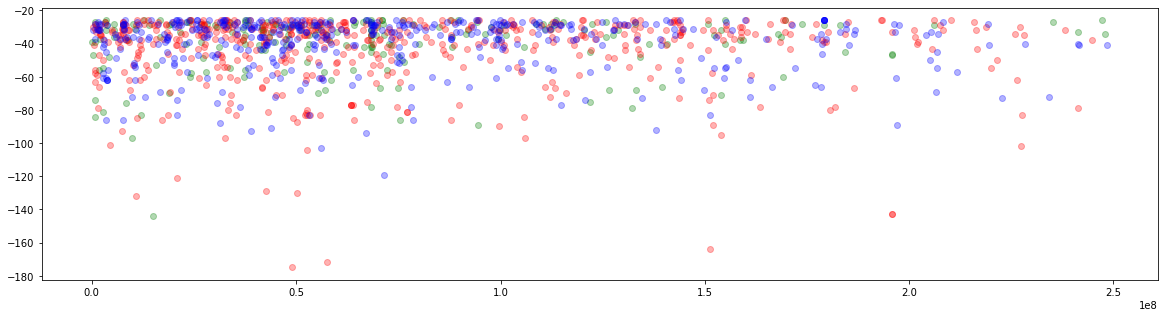

In [27]:
fig, ax = plt.subplots(1,1,  figsize = (20,5))

plt.subplots_adjust(wspace = 0.2)

colors = {'Mesoderm': 'Green', 'Endoderm': 'Red', 'Ectoderm': 'Blue'}
alpha_val = 0.3

for ind,i in enumerate(['Mesoderm', 'Endoderm', 'Ectoderm']):
    layer = all_layers.query(f'layer == "{i}"')
    not_equal = layer.query('End_Position - Start_Position > 25')
    ax.scatter(not_equal.Start_Position, not_equal.Start_Position - not_equal.End_Position, 
                alpha = alpha_val, label = i, color = colors[i])


In [20]:
all_layers.query('End_Position - Start_Position > 10')

,Hugo_Symbol,Chromosome,Start_Position,End_Position,layer
139995,COMP,chr19,18785522,18785557,Endoderm
140011,HNRNPA2B1,chr7,26193368,26193379,Endoderm
140030,SURF2,chr9,133360119,133360154,Endoderm
140031,RSF1,chr11,77698653,77698667,Endoderm
140819,ADAM30,chr1,119894119,119894145,Endoderm
...,...,...,...,...,...
1554534,TTLL8,chr22,50031880,50031892,Mesoderm
1554535,USP26,chrX,133027089,133027104,Mesoderm
1555040,ARID1A,chr1,26767893,26767906,Mesoderm
1555043,NUTM2A,chr10,87234560,87234571,Mesoderm


In [15]:
mid = starts[1][0]
diffs = []

for i in starts:
    diffs.append(i[0]-mid)

# diffs = (starts[0][0]-starts[1][0], starts[2][0]-starts[1][0])

# plt.hist(, bins = starts[0][1], weights = diffs)

# for ind in range(len(starts)):
#     print(starts[ind], len(starts[ind]))
#     print(starts[ind][0]-ends[ind][0])

In [97]:
starts[0][1]

array([1.59960000e+04, 2.49062235e+07, 4.97964510e+07, 7.46866785e+07,
       9.95769060e+07, 1.24467134e+08, 1.49357361e+08, 1.74247588e+08,
       1.99137816e+08, 2.24028044e+08, 2.48918271e+08])

In [26]:
cv2.compareHist(diffs[0], diffs[1], cv2.HISTCMP_BHATTACHARYYA)

error: OpenCV(4.2.0) C:\projects\opencv-python\opencv\modules\imgproc\src\histogram.cpp:2030: error: (-215:Assertion failed) H1.type() == H2.type() && H1.depth() == CV_32F in function 'cv::compareHist'


In [23]:
import cv2

In [15]:
len(data)

1555257

In [14]:
### Get all the features columns except the class
features = list(all_layers.columns)[2:4]
# Get the features data
data = all_layers[features]

In [45]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)
y_kmeans = kmeans.predict(data)


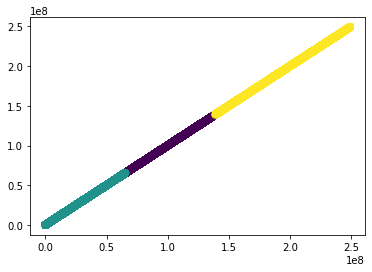

In [49]:
plt.scatter(data.iloc[:, 0], data.iloc[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[0], centers[1], c='black', s=200, alpha=0.5);
plt.show()

In [47]:
clustering_kmeans = KMeans(n_clusters=3, precompute_distances="auto", n_jobs=-1)
data['clusters'] = clustering_kmeans.fit_predict(data)

C:\Users\Shonak\capstone_180a\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


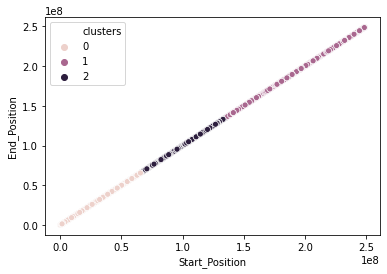

In [48]:
sns.scatterplot(x=data['Start_Position'], y=data["End_Position"], hue=data['clusters'])
plt.show()

In [75]:
from sklearn.cluster import DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN